# Flight Price Prediction

#### Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

There are two datasets `train` and `test`. First we will import the `train dataset for building our model` and then will use the `test dataset for getting prediction from the trained model`.

#### Features Information:

`Airline`: The name of the airline.  
`Date_of_Journey`: The date of the journey.  
`Source`: The source from which the service begins.  
`Destination`: The destination where the service ends.  
`Route`: The route taken by the flight to reach the destination.  
`Dep_Time`: The time when the journey starts from the source.  
`Arrival_Time`: Time of arrival at the destination.  
`Duration`: Total duration of the flight.  
`Total_Stops`: Total stops between the source and destination.  
`Additional_Info`: Additional information about the flight.
`Price`: The price of the ticket.

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset (Train)
train_fp = pd.read_csv("Flight_Price_Prediction_TRAIN.csv")
train_fp

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
# Dataset (Test)
test_fp = pd.read_csv("Flight_Price_Prediction_TEST.csv")
test_fp

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


## TRAIN DATASET

In [4]:
# First 10 rows
train_fp.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [5]:
# Last 10 rows
train_fp.tail(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10673,Jet Airways,27/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,No info,16704
10674,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,20:35,21:20 13 Mar,24h 45m,1 stop,In-flight meal not included,11087
10675,Air India,9/06/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100
10676,Multiple carriers,1/05/2019,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,8h 40m,1 stop,No info,9794
10677,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
# Sample
train_fp.sample(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4131,Jet Airways,27/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,04:25 28 May,18h 45m,2 stops,In-flight meal not included,13029
1099,Air India,6/05/2019,Kolkata,Banglore,CCU → GAU → DEL → BLR,16:45,08:55 07 May,16h 10m,2 stops,No info,13227
6067,Air India,6/04/2019,Delhi,Cochin,DEL → MAA → COK,17:20,09:25 07 Apr,16h 5m,1 stop,No info,4697
3680,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,15:00,01:30 16 Jun,10h 30m,1 stop,No info,13377


In [7]:
train_fp.shape

(10683, 11)

The dataset for training contains `10683` rows and `11` columns.

# Preprocessing and EDA:

In [8]:
# Column Names
train_fp.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
train_fp.shape

(10683, 11)

In [10]:
# Column Data Types
train_fp.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
# Checking for null values
train_fp.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# Checking for null values
train_fp.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We can see one null value present in Route & Total_Stops columns.

<AxesSubplot:>

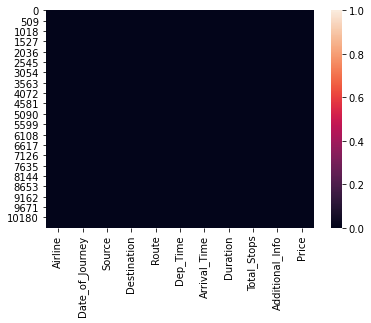

In [13]:
# Visualizing the null values
sns.heatmap(train_fp.isnull())

# Treating the Null Values

We shall replace the null values present in both columns with `mode` of the respective columns, as the columns are categorical in nature.

In [14]:
print("The mode of Route is:",train_fp["Route"].mode())
print("The mode of Total_Stops is:",train_fp["Total_Stops"].mode())

The mode of Route is: 0    DEL → BOM → COK
dtype: object
The mode of Total_Stops is: 0    1 stop
dtype: object


In [15]:
train_fp["Route"] = train_fp["Route"].fillna(train_fp["Route"].mode()[0])
train_fp["Total_Stops"] = train_fp["Total_Stops"].fillna(train_fp["Total_Stops"].mode()[0])

In [16]:
train_fp.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Null values are removed.

In [17]:
train_fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [18]:
# Checking unique values of each column
train_fp.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [19]:
# Value counts of each column.
for i in train_fp.columns:
        print(train_fp[i].value_counts())
        print('-----------------------------------------------------')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
-----------------------------------------------------
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218


In [20]:
# Checking unique values of target column
train_fp['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

In [21]:
# Checking for empty observations
train_fp.loc[train_fp['Price'] == " "]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


No empty observations present in target column.

# Feature Engineering:

In [22]:
import datetime as dt

We shall convert the columns, `Date_of_Journey`, `Dep_Time` & `Arrival_Time` from object datatype to datetime.

In [23]:
# Converting object data type to datetime 
train_fp['Date_of_Journey'] =  pd.to_datetime(train_fp['Date_of_Journey'])
train_fp['Dep_Time'] =  pd.to_datetime(train_fp['Dep_Time'])
train_fp['Arrival_Time'] =  pd.to_datetime(train_fp['Arrival_Time'])

In [24]:
train_fp.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Extracting the journey year,month and day from Date_of_Journey.

In [25]:
#Extracting year
train_fp["Journey_Year"]=pd.to_datetime(train_fp.Date_of_Journey, format="%d/%m/%Y").dt.year

#Extracting month
train_fp["Journey_Month"]=pd.to_datetime(train_fp.Date_of_Journey, format="%d/%m/%Y").dt.month

#Extracting day
train_fp["Journey_Day"]=pd.to_datetime(train_fp.Date_of_Journey, format="%d/%m/%Y").dt.day

After extracting values, Date_of_Journey is not needed so we shall drop this column.

In [26]:
# Dropping Date_of_Journey column
train_fp = train_fp.drop(["Date_of_Journey"],axis=1)

The column `Duration` has values in terms of minutes and hours. Now let's extract hours and minutes from Duration.

In [27]:
# Converting duration column into list
duration=list(train_fp["Duration"])

for i in range(len(duration)):
    
    # Checking if duration contains only hour or minute
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'   
        else:
            duration[i]= "0h " + duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    
    # Extracting hours feom Duration
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    
    # Extracting minutes from Duration
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [28]:
# Adding duration hours and duration mins to the data set
train_fp["Duration_Hours"] = duration_hours
train_fp["Duration_Mins"] = duration_mins

Now we have Duration_Hours and Duration_Mins, we don't need Duration Column now. Let's drop it.

In [29]:
# Dropping Duration column
train_fp.drop("Duration",axis=1,inplace=True)

Let's extract values from Dep_Time. Departure time means when a flight leaves the airport and this column contains hours and minutes so we will extract hours and minutes from Dep_Time.

In [30]:
# Extracting Hours from Dep_Time column
train_fp["Dep_Hour"] = pd.to_datetime(train_fp["Dep_Time"]).dt.hour

# Extracting Minutes from Dep_Time column
train_fp["Dep_Min"] = pd.to_datetime(train_fp["Dep_Time"]).dt.minute

Now, we shall drop Dep_Time column.

In [31]:
# Dropping Dep_Time column
train_fp.drop("Dep_Time",axis=1,inplace=True)

Similarly we can extract hours and minutes from `Arrival_Time` column and accordingly dropping Arrival_time column.

In [32]:
# Extracting hour from Arrival_Time
train_fp["Arrival_Hour"] = pd.to_datetime(train_fp["Arrival_Time"]).dt.hour

# Extracting Minutes from Arrival_Time column
train_fp["Arrival_Min"] = pd.to_datetime(train_fp["Arrival_Time"]).dt.minute

In [33]:
# Dropping Arrival_Time column
train_fp.drop("Arrival_Time",axis=1,inplace=True)

In [34]:
train_fp.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Duration_Hours,Duration_Mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,9,6,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,12,5,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,1,3,4,45,16,50,21,35


In [35]:
train_fp.shape

(10683, 16)

In [36]:
# Value counts of each column.
for i in train_fp.columns:
        print(train_fp[i].value_counts())
        print('-----------------------------------------------------')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
-----------------------------------------------------
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
-----------------------------------------------------
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
-----------------------------------------------------
DEL → BOM → COK                      2377
BLR → DEL   

From the above value counts we can observe some repeated categories in some columns. Let's replace them.

In [37]:
# Replacing "Jet Airways Business" as "Jet Airways" in the Airline column 
train_fp["Airline"] = train_fp["Airline"].replace("Jet Airways Business","Jet Airways")

In [38]:
# Replacing "Multiple carriers Premium economy" as "Multiple carriers" in Airline column 
train_fp["Airline"] = train_fp["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

In [39]:
# Replacing "Vistara Premium economy" as "Vistara" in Airline column
train_fp["Airline"] = train_fp["Airline"].replace("Vistara Premium economy","Vistara")

In [40]:
# Replacing "New Delhi" as "Delhi" in Destination column
train_fp["Destination"] = train_fp["Destination"].replace("New Delhi","Delhi")

In [41]:
# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
train_fp["Additional_Info"] = train_fp["Additional_Info"].replace("No info","No Info")

In [42]:
# Replacing "1 Long layover" and "2 Long layover" as "Long layover" in the column Additional Info
train_fp["Additional_Info"] = train_fp["Additional_Info"].replace(["1 Long layover","2 Long layover"],"Long layover")

In [43]:
for i in train_fp.columns:
        print(train_fp[i].value_counts())
        print('-----------------------------------------------------')

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64
-----------------------------------------------------
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
-----------------------------------------------------
Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
-----------------------------------------------------
DEL → BOM → COK                      2377
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → BLR → CCU → BBI → HYD             1
BLR → HBX → BOM → NAG → DEL             1
BOM → 

In [44]:
train_fp.describe()

,Price,Journey_Year,Journey_Month,Journey_Day,Duration_Hours,Duration_Mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,2019.0,5.534775,12.682205,10.246092,28.327717,12.490686,24.411214,13.348778,24.690630
std,4611.359167,0.0,2.987489,8.803701,8.495414,16.945400,5.748650,18.767980,6.859125,16.506036
min,1759.000000,2019.0,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,2019.0,3.000000,5.000000,2.000000,15.000000,8.000000,5.000000,8.000000,10.000000
50%,8372.000000,2019.0,5.000000,6.000000,8.000000,30.000000,11.000000,25.000000,14.000000,25.000000
75%,12373.000000,2019.0,6.000000,21.000000,15.000000,45.000000,18.000000,40.000000,19.000000,35.000000
max,79512.000000,2019.0,12.000000,27.000000,47.000000,55.000000,23.000000,55.000000,23.000000,55.000000


# Data Visualization

In [45]:
categorical=[]
for i in train_fp.dtypes.index:
    if train_fp.dtypes[i]=='object':
        categorical.append(i)
print(categorical)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [46]:
numerical=[]
for i in train_fp.dtypes.index:
    if train_fp.dtypes[i]!='object':
        numerical.append(i)
print(numerical)

['Price', 'Journey_Year', 'Journey_Month', 'Journey_Day', 'Duration_Hours', 'Duration_Mins', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


In [47]:
train_fp.nunique()

Airline               9
Source                5
Destination           5
Route               128
Total_Stops           5
Additional_Info       8
Price              1870
Journey_Year          1
Journey_Month         7
Journey_Day           9
Duration_Hours       44
Duration_Mins        12
Dep_Hour             24
Dep_Min              12
Arrival_Hour         24
Arrival_Min          12
dtype: int64

# Uni-Variate Analysis

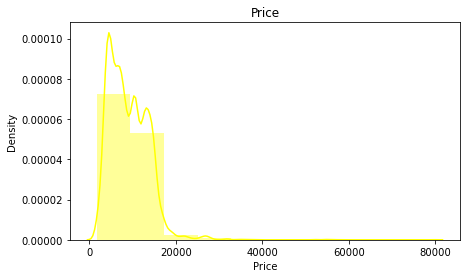

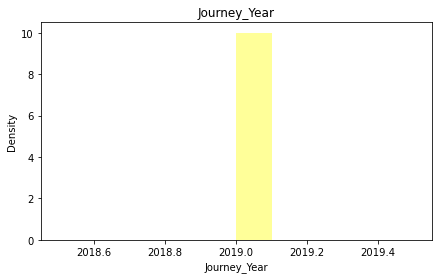

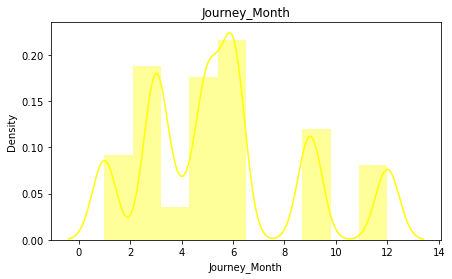

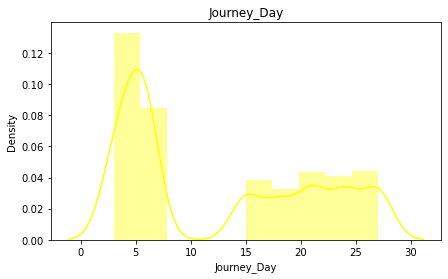

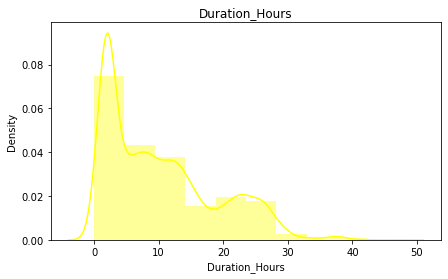

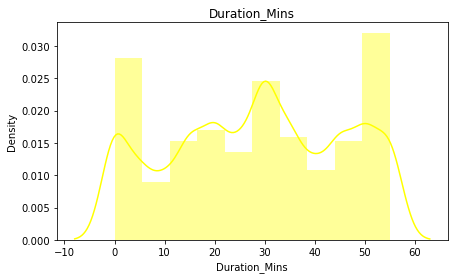

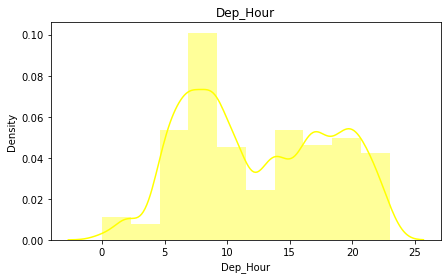

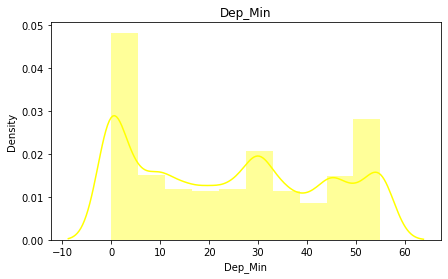

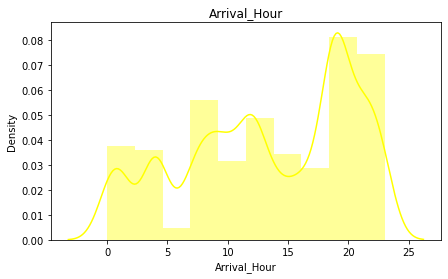

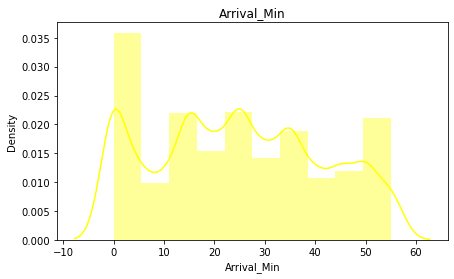

In [48]:
for i in train_fp[numerical]:              
    plt.figure(figsize = (7, 4))
    sns.distplot(train_fp[i], bins = 10, color="yellow")
    plt.title(i)
    plt.show()

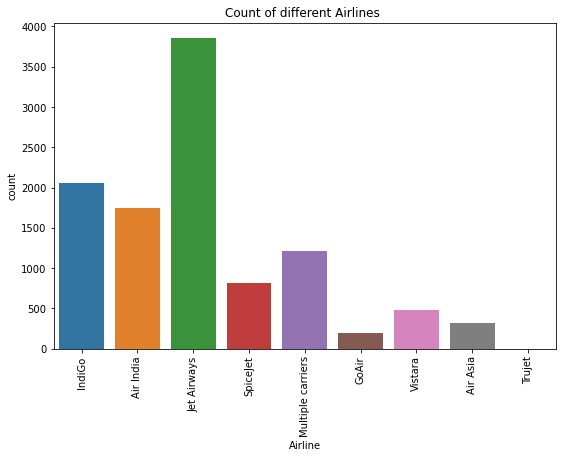

In [49]:
plt.figure(figsize=(9,6))
sns.countplot(train_fp["Airline"])
plt.title("Count of different Airlines ")
plt.xticks(rotation=90)
plt.show()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


<AxesSubplot:ylabel='Source'>

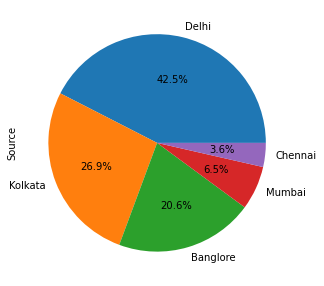

In [50]:
plt.figure(figsize=(10,5))
print(train_fp['Source'].value_counts())
train_fp['Source'].value_counts().plot.pie(autopct='%1.1f%%')

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


<AxesSubplot:ylabel='Destination'>

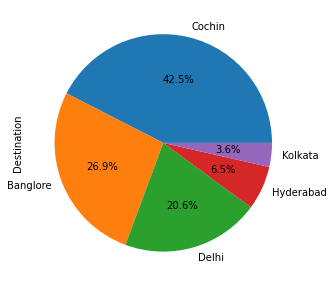

In [51]:
plt.figure(figsize=(10,5))
print(train_fp['Destination'].value_counts())
train_fp['Destination'].value_counts().plot.pie(autopct='%1.1f%%')

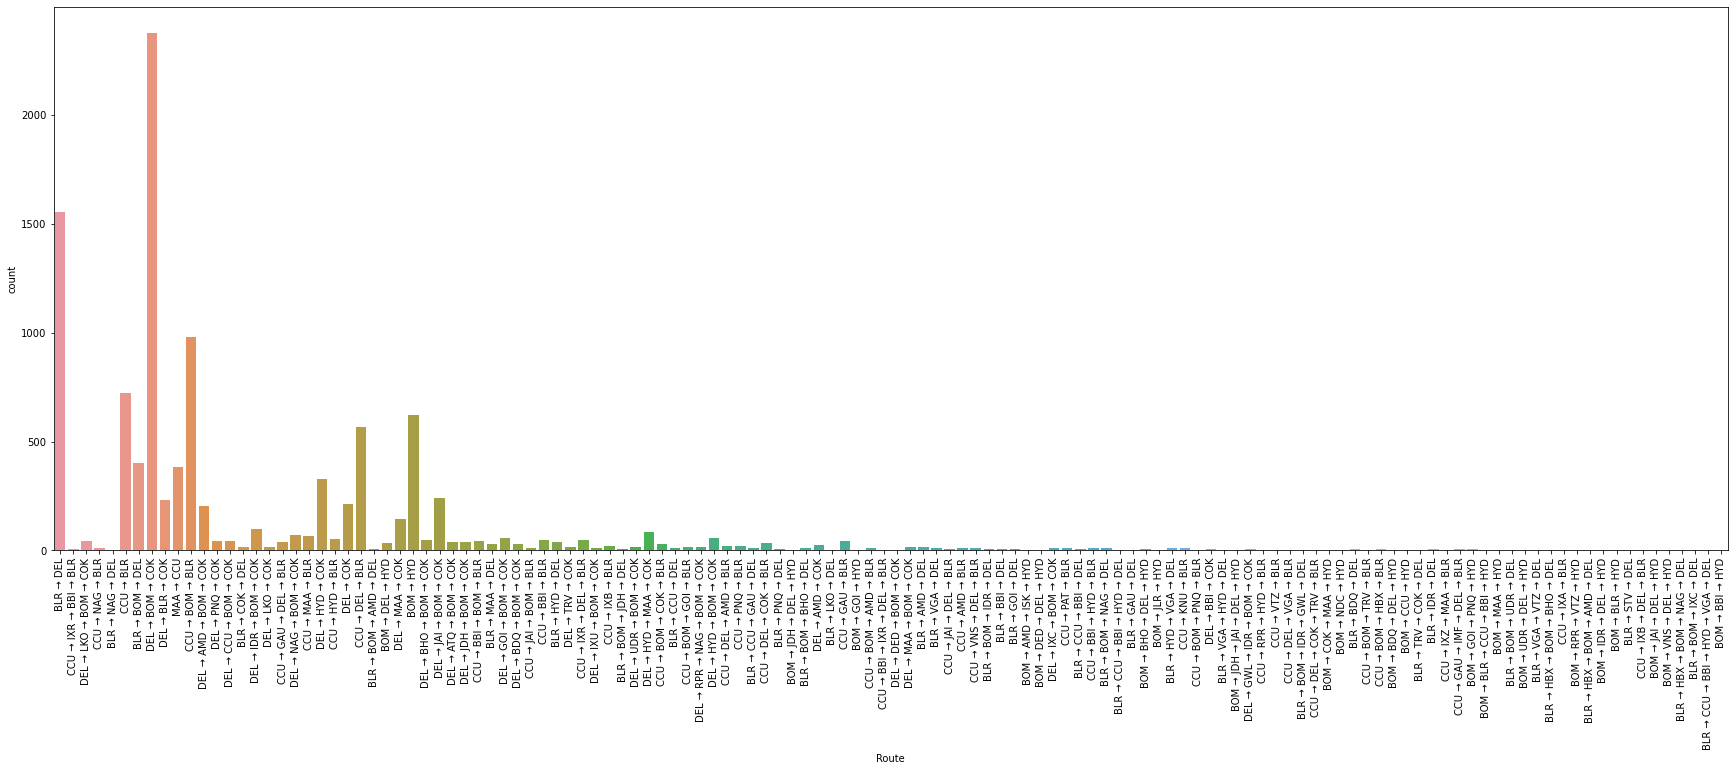

In [52]:
plt.figure(figsize=[30,10])
sns.countplot(train_fp['Route'])
plt.xticks(rotation=90)
plt.show()

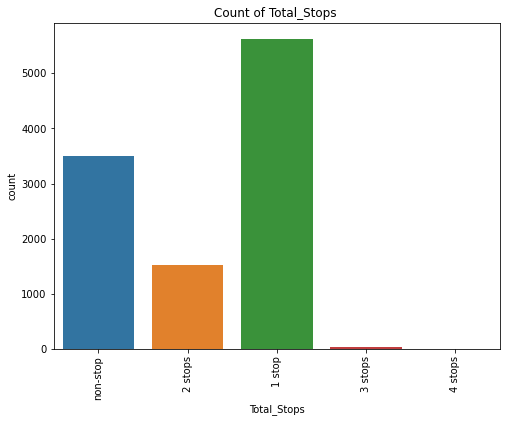

In [53]:
plt.figure(figsize=(8,6))
sns.countplot(train_fp["Total_Stops"])
plt.title("Count of Total_Stops ")
plt.xticks(rotation=90)
plt.show()

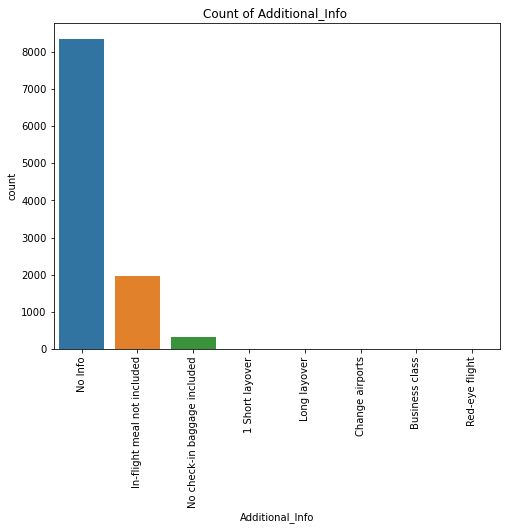

In [54]:
plt.figure(figsize=(8,6))
sns.countplot(train_fp["Additional_Info"])
plt.title("Count of Additional_Info ")
plt.xticks(rotation=90)
plt.show()

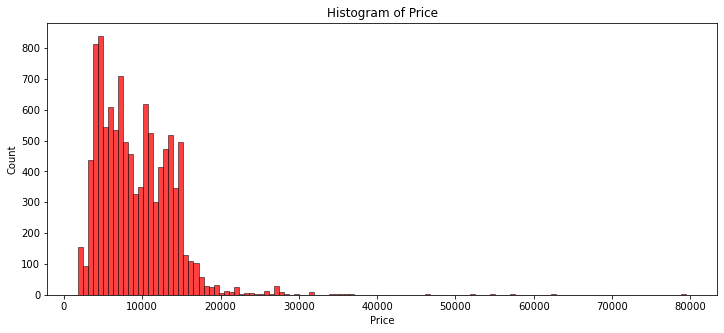

In [55]:
plt.figure(figsize=(12,5))
sns.histplot(train_fp['Price'],color='red')
plt.title("Histogram of Price")
plt.show()

# Bi-Variate Analysis

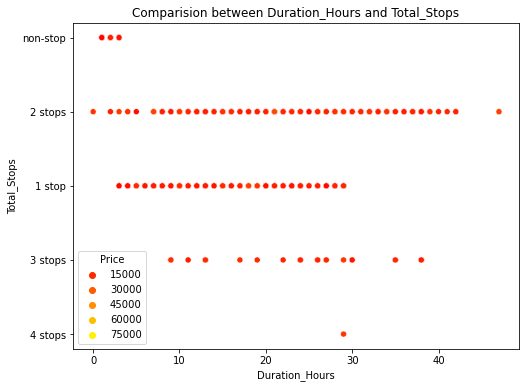

In [56]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Duration_Hours and Total_Stops')
sns.scatterplot(train_fp['Duration_Hours'],train_fp['Total_Stops'],hue=train_fp['Price'],palette="autumn");

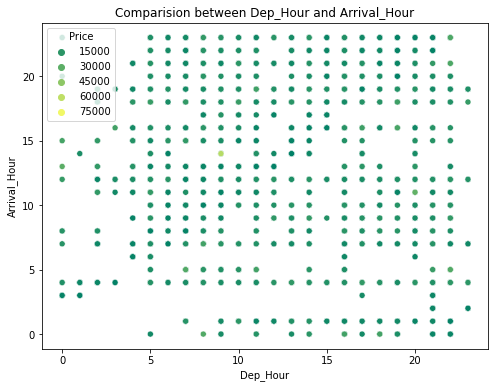

In [57]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Dep_Hour and Arrival_Hour')
sns.scatterplot(train_fp['Dep_Hour'],train_fp['Arrival_Hour'],hue=train_fp['Price'],palette="summer");

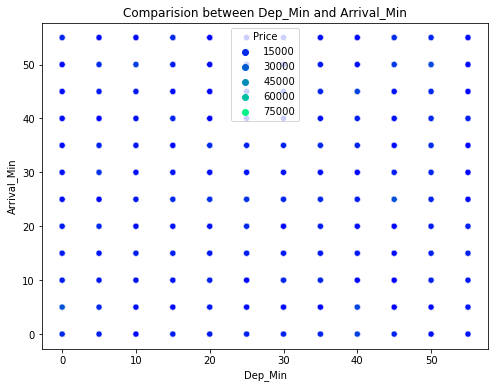

In [58]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Dep_Min and Arrival_Min')
sns.scatterplot(train_fp['Dep_Min'],train_fp['Arrival_Min'],hue=train_fp['Price'],palette="winter");

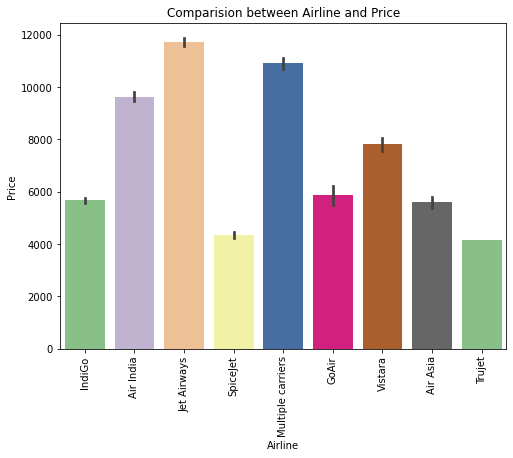

In [59]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Airline and Price')
sns.barplot(x = "Airline", y = "Price", data = train_fp, palette="Accent")
plt.xticks(rotation=90)
plt.show()

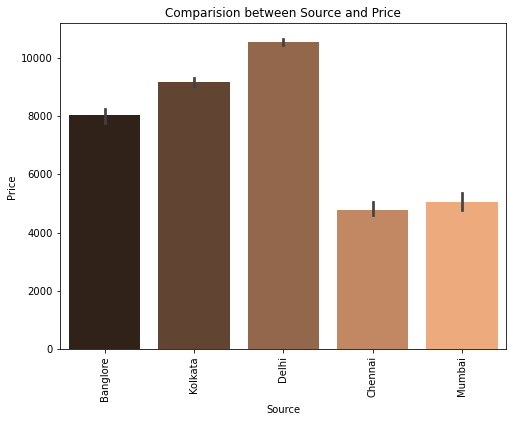

In [60]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Source and Price')
sns.barplot(x = "Source", y = "Price", data = train_fp, palette="copper")
plt.xticks(rotation=90)
plt.show()

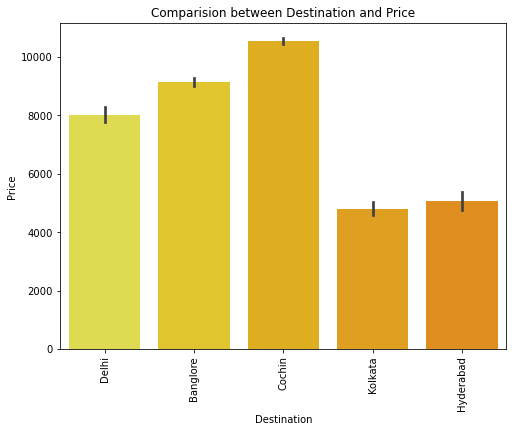

In [61]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Destination and Price')
sns.barplot(x = "Destination", y = "Price", data = train_fp, palette="Wistia")
plt.xticks(rotation=90)
plt.show()

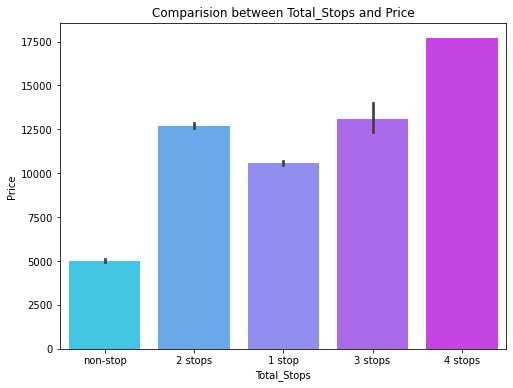

In [62]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Total_Stops and Price')
sns.barplot(x = "Total_Stops", y = "Price", data = train_fp, palette="cool")
plt.show()

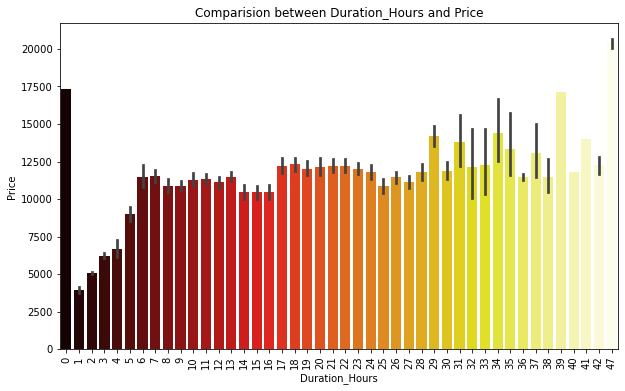

In [63]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Duration_Hours and Price')
sns.barplot(x = "Duration_Hours", y = "Price", data = train_fp, palette="hot")
plt.xticks(rotation=90)
plt.show()

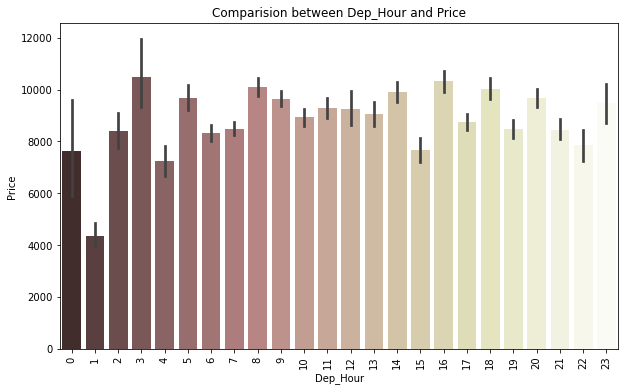

In [64]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Dep_Hour and Price')
sns.barplot(x = "Dep_Hour", y = "Price", data = train_fp, palette="pink")
plt.xticks(rotation=90)
plt.show()

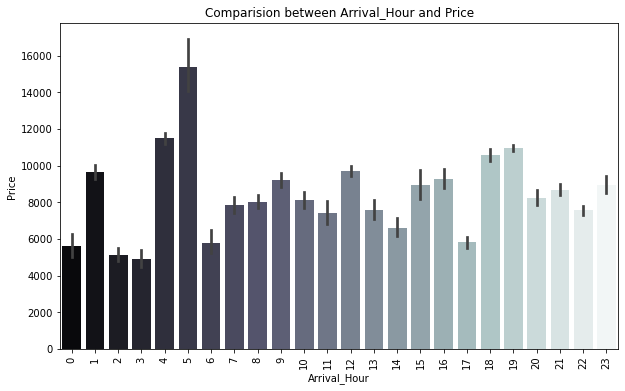

In [65]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Arrival_Hour and Price')
sns.barplot(x = "Arrival_Hour", y = "Price", data = train_fp, palette="bone")
plt.xticks(rotation=90)
plt.show()

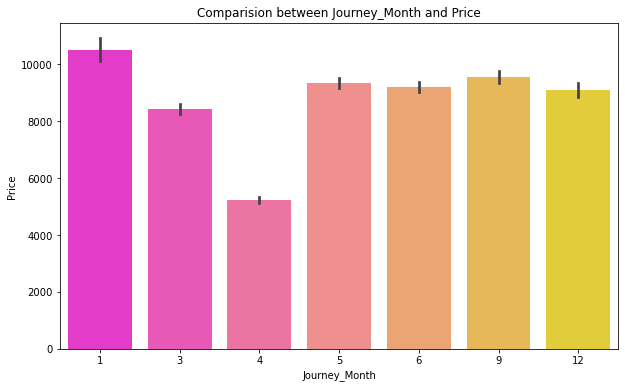

In [66]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Journey_Month and Price')
sns.barplot(x = "Journey_Month", y = "Price", data = train_fp, palette="spring")
plt.show()

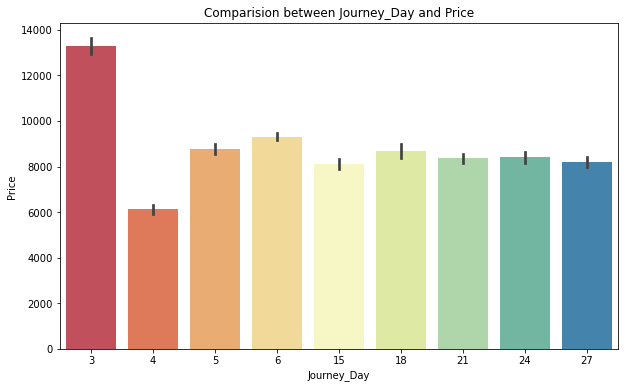

In [67]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Journey_Day and Price')
sns.barplot(x = "Journey_Day", y = "Price", data = train_fp, palette="Spectral")
plt.show()

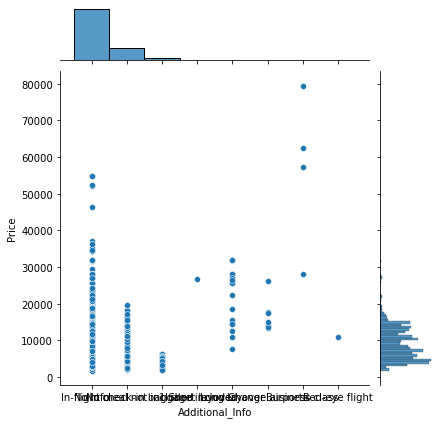

In [68]:
sns.jointplot(data=train_fp,x="Additional_Info",y="Price")

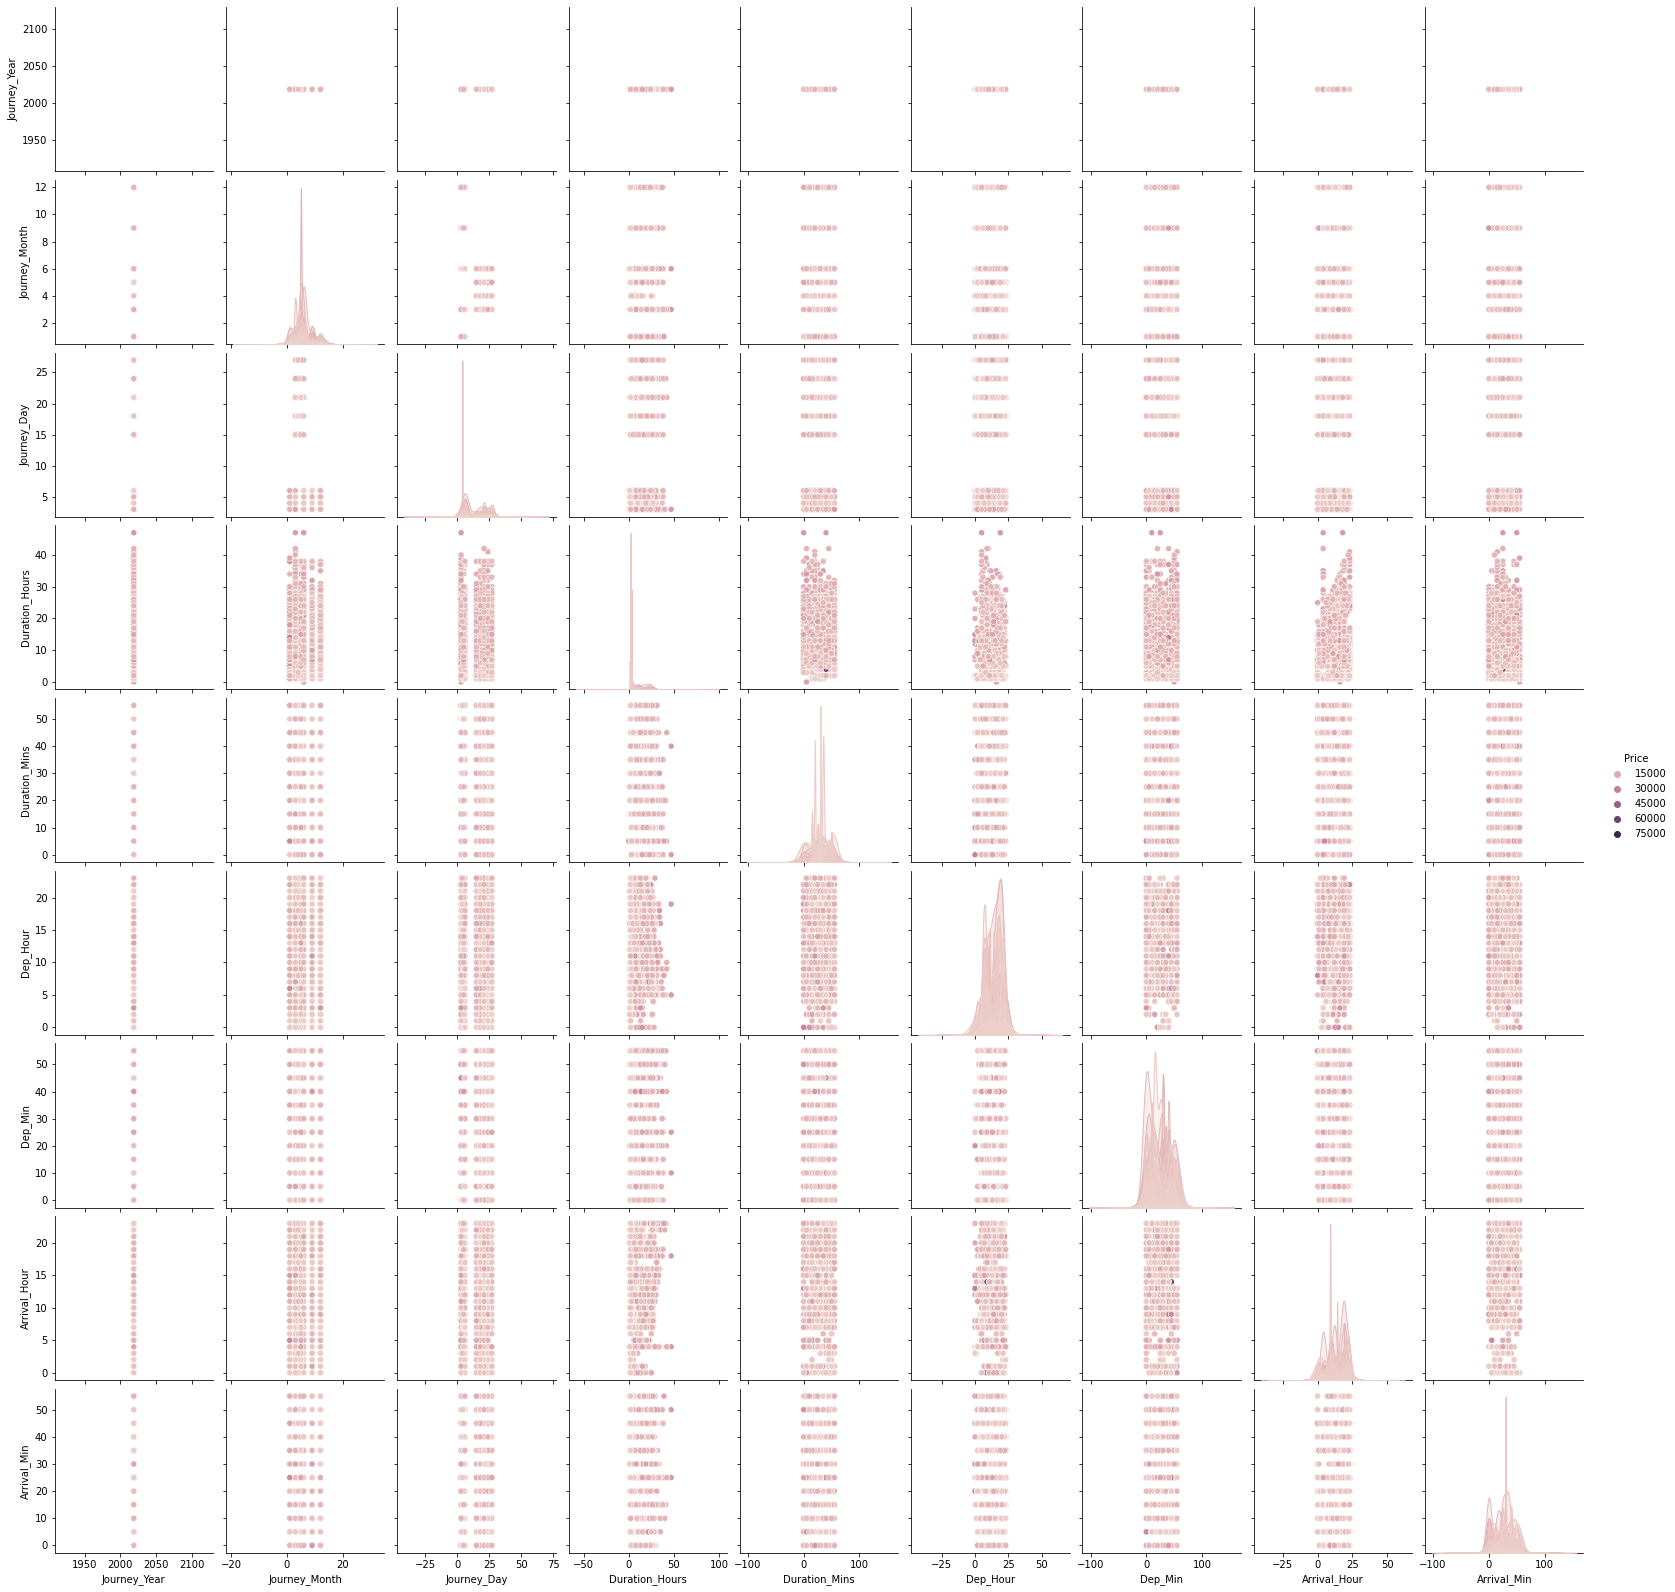

In [69]:
sns.pairplot(train_fp,hue="Price")
plt.show()

# Encoding The Data Frame

In [70]:
train_fp.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Year', 'Journey_Month',
       'Journey_Day', 'Duration_Hours', 'Duration_Mins', 'Dep_Hour', 'Dep_Min',
       'Arrival_Hour', 'Arrival_Min'],
      dtype='object')

In [71]:
train_fp.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Year        int64
Journey_Month       int64
Journey_Day         int64
Duration_Hours      int64
Duration_Mins       int64
Dep_Hour            int64
Dep_Min             int64
Arrival_Hour        int64
Arrival_Min         int64
dtype: object

Encoding the categorical columns using Label Encoder.

In [72]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [73]:
train_fp['Airline'] = le.fit_transform(train_fp['Airline'])
train_fp['Source'] = le.fit_transform(train_fp['Source'])
train_fp['Destination'] = le.fit_transform(train_fp['Destination'])
train_fp['Route'] = le.fit_transform(train_fp['Route'])
train_fp['Total_Stops'] = le.fit_transform(train_fp['Total_Stops'])
train_fp['Additional_Info'] = le.fit_transform(train_fp['Additional_Info'])

In [74]:
train_fp

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Duration_Hours,Duration_Mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,4,5,3897,2019,3,24,2,50,22,20,1,10
1,1,3,0,84,1,5,7662,2019,1,5,7,25,5,50,13,15
2,4,2,1,118,1,5,13882,2019,9,6,19,0,9,25,4,25
3,3,3,0,91,0,5,6218,2019,12,5,5,25,18,5,23,30
4,3,0,2,29,0,5,13302,2019,1,3,4,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,5,4107,2019,9,4,2,30,19,55,22,25
10679,1,3,0,64,4,5,4145,2019,4,27,2,35,20,45,23,20
10680,4,0,2,18,4,5,7229,2019,4,27,3,0,8,20,11,20
10681,8,0,2,18,4,5,12648,2019,1,3,2,40,11,30,14,10


# Outliers

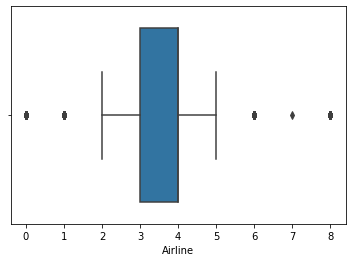

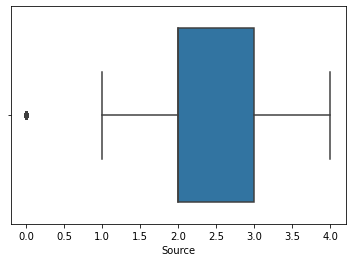

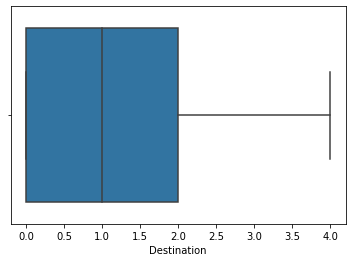

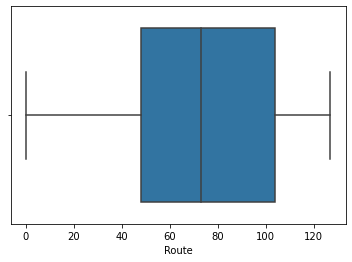

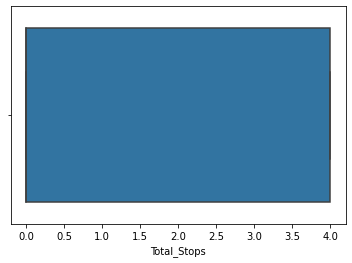

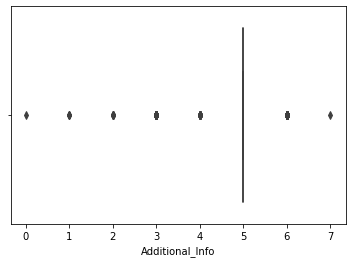

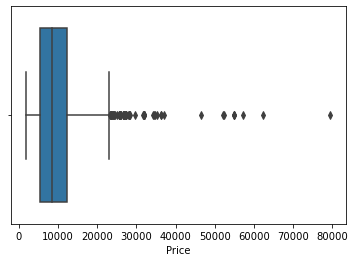

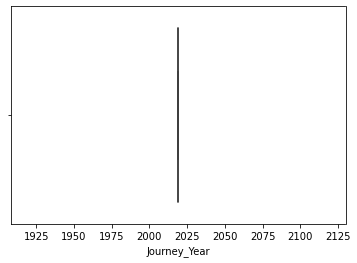

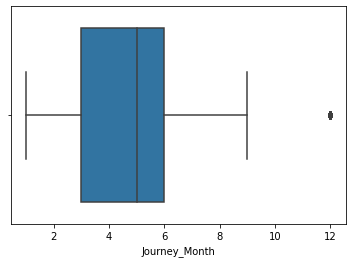

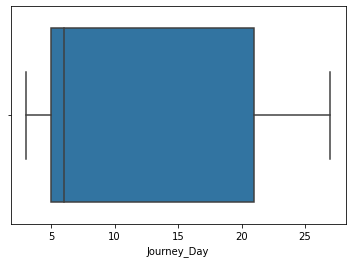

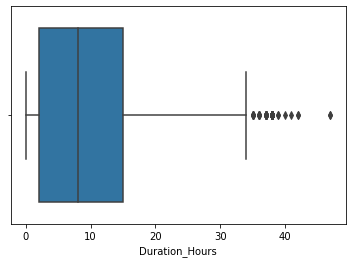

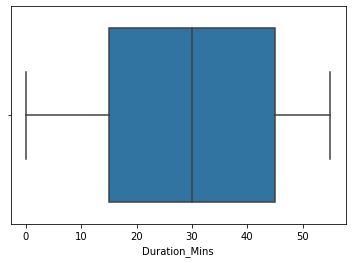

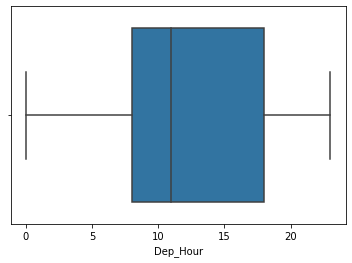

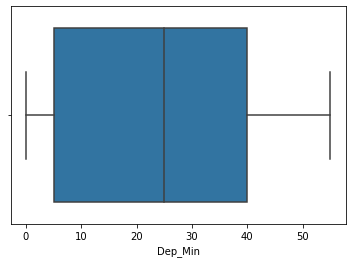

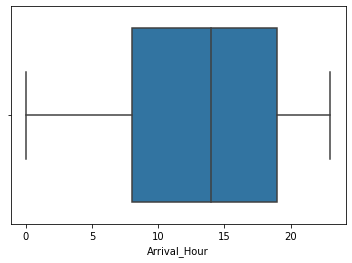

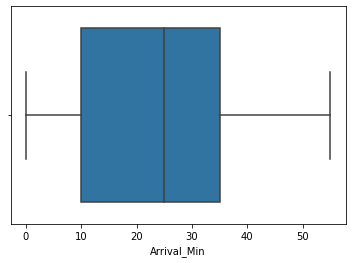

In [75]:
for i in train_fp.columns:
    sns.boxplot(train_fp[i])
    plt.show()

Airline               AxesSubplot(0.125,0.536818;0.0596154x0.343182)
Source             AxesSubplot(0.196538,0.536818;0.0596154x0.343182)
Destination        AxesSubplot(0.268077,0.536818;0.0596154x0.343182)
Route              AxesSubplot(0.339615,0.536818;0.0596154x0.343182)
Total_Stops        AxesSubplot(0.411154,0.536818;0.0596154x0.343182)
Additional_Info    AxesSubplot(0.482692,0.536818;0.0596154x0.343182)
Price              AxesSubplot(0.554231,0.536818;0.0596154x0.343182)
Journey_Year       AxesSubplot(0.625769,0.536818;0.0596154x0.343182)
Journey_Month      AxesSubplot(0.697308,0.536818;0.0596154x0.343182)
Journey_Day        AxesSubplot(0.768846,0.536818;0.0596154x0.343182)
Duration_Hours     AxesSubplot(0.840385,0.536818;0.0596154x0.343182)
Duration_Mins            AxesSubplot(0.125,0.125;0.0596154x0.343182)
Dep_Hour              AxesSubplot(0.196538,0.125;0.0596154x0.343182)
Dep_Min               AxesSubplot(0.268077,0.125;0.0596154x0.343182)
Arrival_Hour          AxesSubplot(

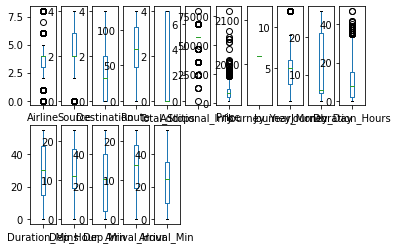

In [76]:
train_fp.plot(kind='box',subplots=True,layout=(2,11))

As seen above, there are a significant number of outliers present in this dataset in columns, `Airline, Source, Additional_Info, Price, Journey_Month` & `Duration_Hours`. 

# Removing Outliers

We shall remove the outliers present in the dataset using Z-Score Method.

In [77]:
df_outliers=train_fp[["Airline", "Source", "Additional_Info","Price","Journey_Month","Duration_Hours"]]

In [78]:
from scipy.stats import zscore

z=np.abs(zscore(df_outliers))
TRAIN_FP=train_fp[(z<3).all(axis=1)]
TRAIN_FP

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Duration_Hours,Duration_Mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,4,5,3897,2019,3,24,2,50,22,20,1,10
1,1,3,0,84,1,5,7662,2019,1,5,7,25,5,50,13,15
2,4,2,1,118,1,5,13882,2019,9,6,19,0,9,25,4,25
3,3,3,0,91,0,5,6218,2019,12,5,5,25,18,5,23,30
4,3,0,2,29,0,5,13302,2019,1,3,4,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,5,4107,2019,9,4,2,30,19,55,22,25
10679,1,3,0,64,4,5,4145,2019,4,27,2,35,20,45,23,20
10680,4,0,2,18,4,5,7229,2019,4,27,3,0,8,20,11,20
10681,8,0,2,18,4,5,12648,2019,1,3,2,40,11,30,14,10


In [79]:
TRAIN_FP.shape

(10516, 16)

In [80]:
train_fp.shape

(10683, 16)

In [81]:
Data_loss=((10683-10516)/10683)*100
Data_loss

1.5632313020687072

The data loss after z-score is `1.56 %`.

# Skewness

In [82]:
TRAIN_FP.skew()

Airline            0.136979
Source            -0.437969
Destination        0.861141
Route             -0.505854
Total_Stops        0.615061
Additional_Info   -1.374817
Price              0.414851
Journey_Year       0.000000
Journey_Month      0.634571
Journey_Day        0.354185
Duration_Hours     0.764251
Duration_Mins     -0.097917
Dep_Hour           0.102678
Dep_Min            0.171453
Arrival_Hour      -0.361693
Arrival_Min        0.106870
dtype: float64

We can see high levels of skewness present in most of the columns.

In [83]:
df_skew=["Source", "Destination","Route","Total_Stops","Journey_Month","Duration_Hours","Arrival_Hour","Additional_Info"]

We shall use Power Transformer to remove skewness.

In [84]:
from sklearn.preprocessing import PowerTransformer
scal = PowerTransformer(method='yeo-johnson')

In [85]:
TRAIN_FP[df_skew] = scal.fit_transform(TRAIN_FP[df_skew].values)

In [86]:
TRAIN_FP[df_skew].skew()

Source            -0.236517
Destination       -0.011053
Route             -0.435407
Total_Stops        0.324072
Journey_Month     -0.023584
Duration_Hours    -0.031575
Arrival_Hour      -0.353050
Additional_Info   -0.008912
dtype: float64

In [87]:
TRAIN_FP

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Duration_Hours,Duration_Mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,-1.612130,0.913220,-1.551861,1.286927,0.307383,3897,2019,-0.842563,24,-1.167071,50,22,20,-1.790235,10
1,1,0.894963,-1.382974,0.220910,0.348806,0.307383,7662,2019,-1.919230,5,-0.040984,25,5,50,-0.050342,15
2,4,-0.027035,0.041693,1.207176,0.348806,0.307383,13882,2019,1.133640,6,1.099100,0,9,25,-1.358869,25
3,3,0.894963,-1.382974,0.421065,-0.904515,0.307383,6218,2019,1.848187,5,-0.381035,25,18,5,1.415358,30
4,3,-1.612130,0.913220,-1.276943,-0.904515,0.307383,13302,2019,-1.919230,3,-0.592289,45,16,50,1.121554,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0.894963,-1.382974,-0.341040,1.286927,0.307383,4107,2019,1.133640,4,-1.167071,30,19,55,1.268420,25
10679,1,0.894963,-1.382974,-0.341040,1.286927,0.307383,4145,2019,-0.426546,27,-1.167071,35,20,45,1.415358,20
10680,4,-1.612130,0.913220,-1.551861,1.286927,0.307383,7229,2019,-0.426546,27,-0.846436,0,8,20,-0.342274,20
10681,8,-1.612130,0.913220,-1.551861,1.286927,0.307383,12648,2019,-1.919230,3,-1.167071,40,11,30,0.095804,10


# Correlation

In [88]:
TRAIN_FP.corr()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Duration_Hours,Duration_Mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.015643,0.045200,0.022231,-0.071245,0.021766,0.026344,NaN,0.002075,0.025212,-0.078836,-0.044052,-0.029291,-0.070527,-0.003424,-0.087863
Source,-0.015643,1.000000,-0.508189,0.316891,-0.191131,-0.028627,0.055682,NaN,0.039671,-0.009631,0.130320,-0.137871,0.062919,-0.044877,0.025014,0.032207
Destination,0.045200,-0.508189,1.000000,-0.174070,0.417635,0.107659,-0.268915,NaN,-0.057549,0.031319,-0.423973,0.030213,-0.113661,0.079123,-0.062941,-0.024954
Route,0.022231,0.316891,-0.174070,1.000000,-0.391620,-0.018409,0.255548,NaN,0.041115,0.085192,0.389101,-0.234896,-0.076116,-0.056087,0.011372,-0.181244
Total_Stops,-0.071245,-0.191131,0.417635,-0.391620,1.000000,0.270636,-0.530713,NaN,-0.052919,0.041378,-0.687315,0.180499,0.031478,0.064506,-0.110736,0.180313
Additional_Info,0.021766,-0.028627,0.107659,-0.018409,0.270636,1.000000,-0.172820,NaN,-0.039725,0.000057,-0.289816,0.063533,-0.050589,0.031337,-0.031494,0.036630
Price,0.026344,0.055682,-0.268915,0.255548,-0.530713,-0.172820,1.000000,NaN,0.070186,-0.140589,0.670323,-0.135993,0.012863,-0.054814,0.033655,-0.101703
Journey_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Journey_Month,0.002075,0.039671,-0.057549,0.041115,-0.052919,-0.039725,0.070186,NaN,1.000000,-0.191051,0.075671,-0.023278,0.022889,0.005642,-0.004428,-0.031717
Journey_Day,0.025212,-0.009631,0.031319,0.085192,0.041378,0.000057,-0.140589,NaN,-0.191051,1.000000,-0.037063,-0.009319,-0.004052,-0.013367,-0.001978,-0.021663


In [89]:
TRAIN_FP.corr()['Price'].sort_values(ascending=False)

Price              1.000000
Duration_Hours     0.670323
Route              0.255548
Journey_Month      0.070186
Source             0.055682
Arrival_Hour       0.033655
Airline            0.026344
Dep_Hour           0.012863
Dep_Min           -0.054814
Arrival_Min       -0.101703
Duration_Mins     -0.135993
Journey_Day       -0.140589
Additional_Info   -0.172820
Destination       -0.268915
Total_Stops       -0.530713
Journey_Year            NaN
Name: Price, dtype: float64

<AxesSubplot:>

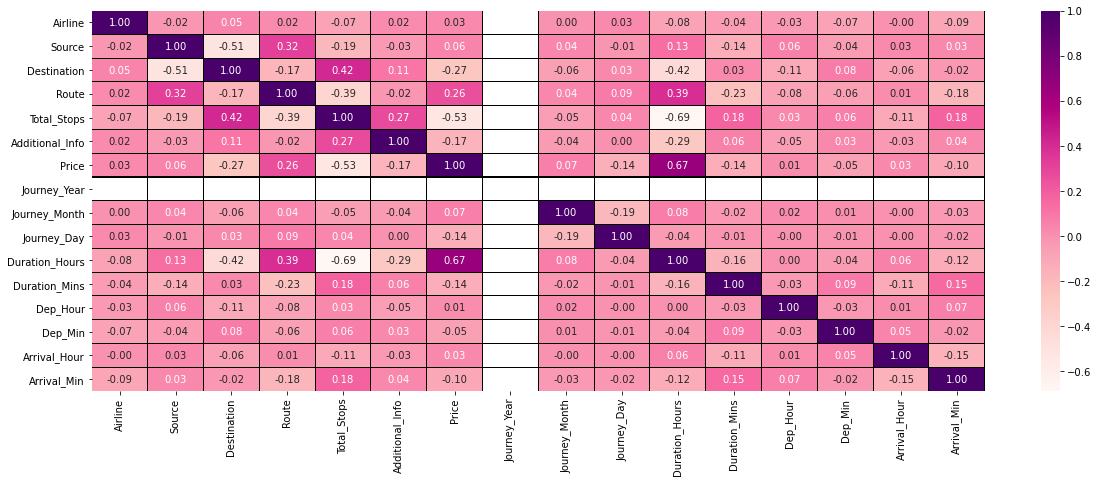

In [90]:
# Visualizing TRAIN_FP.corr() using heatmap
plt.figure(figsize=(20,7))
sns.heatmap(TRAIN_FP.corr(),annot=True,cmap='RdPu',linewidths=0.1,linecolor="black",fmt=".2f")

From the above correlation plot, we see that `Duration_hours` is highly positively correlated with the target variable `Price`. Also, `Route` is positively corelated towards our target variable.

We also see that `Total_Stops` is highly negatively correlated with `Price`, followed by `Destination` & `Additional_Info`.

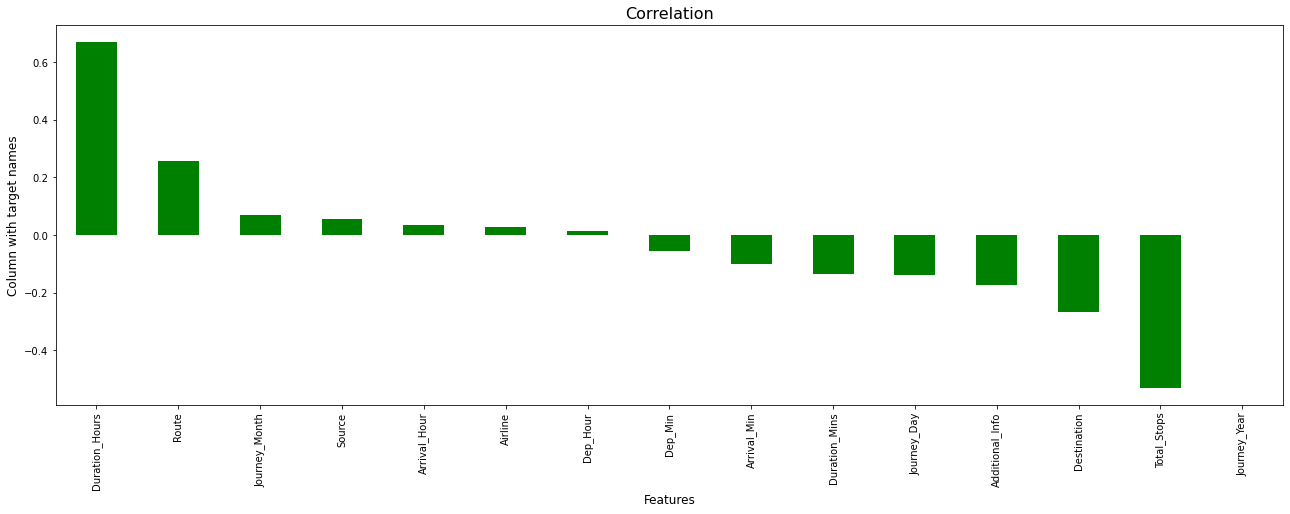

In [91]:
plt.figure(figsize=(22,7))
TRAIN_FP.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Column with target names',fontsize=12)
plt.title('Correlation',fontsize=16)
plt.show()

We can see that `Journey_Year` has no correlation with our target variable. So let's drop this column.

In [92]:
# Dropping Journey_Year column
TRAIN_FP.drop("Journey_Year",axis=1,inplace=True)

# Regression Model Building

In [93]:
x = TRAIN_FP.drop("Price", axis=1)
y = TRAIN_FP["Price"]

In [94]:
x.shape

(10516, 14)

In [95]:
y.shape

(10516,)

# Scaling

In [96]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Duration_Hours,Duration_Mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,-0.345214,-1.612130,0.913220,-1.551861,1.286927,0.307383,-0.842563,1.277556,-1.167071,1.272035,1.650566,-0.231803,-1.790235,-0.887826
1,-1.461360,0.894963,-1.382974,0.220910,0.348806,0.307383,-1.919230,-0.884444,-0.040984,-0.201691,-1.313493,1.370328,-0.050342,-0.585531
2,0.212860,-0.027035,0.041693,1.207176,0.348806,0.307383,1.133640,-0.770654,1.099100,-1.675417,-0.616067,0.035219,-1.358869,0.019059
3,-0.345214,0.894963,-1.382974,0.421065,-0.904515,0.307383,1.848187,-0.884444,-0.381035,-0.201691,0.953141,-1.032869,1.415358,0.321353
4,-0.345214,-1.612130,0.913220,-1.276943,-0.904515,0.307383,-1.919230,-1.112022,-0.592289,0.977289,0.604428,1.370328,1.121554,0.623648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10511,-2.019433,0.894963,-1.382974,-0.341040,1.286927,0.307383,1.133640,-0.998233,-1.167071,0.093054,1.127497,1.637350,1.268420,0.019059
10512,-1.461360,0.894963,-1.382974,-0.341040,1.286927,0.307383,-0.426546,1.618924,-1.167071,0.387799,1.301853,1.103306,1.415358,-0.283236
10513,0.212860,-1.612130,0.913220,-1.551861,1.286927,0.307383,-0.426546,1.618924,-0.846436,-1.675417,-0.790423,-0.231803,-0.342274,-0.283236
10514,2.445152,-1.612130,0.913220,-1.551861,1.286927,0.307383,-1.919230,-1.112022,-1.167071,0.682544,-0.267354,0.302241,0.095804,-0.887826


# VIF

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,Airline,1.053202
1,Source,1.564607
2,Destination,1.794377
3,Route,1.475071
4,Total_Stops,2.198862
5,Additional_Info,1.131902
6,Journey_Month,1.047726
7,Journey_Day,1.057290
8,Duration_Hours,2.263029
9,Duration_Mins,1.122438


There are no extreme VIF values (within 10). So multicollinearity is good.

# Best Random State

In [98]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [99]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.30, random_state = i)
    KNN=neighbors.KNeighborsRegressor()
    KNN.fit(x_train,y_train)
    pred_rs=KNN.predict(x_test)
    r2=r2_score(y_test,pred_rs)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best R2 Score is :",maxAccu," on Random State :",maxRS)

Best R2 Score is : 0.7891332595725048  on Random State : 7


In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [101]:
x_train.shape

(7361, 14)

In [102]:
x_test.shape

(3155, 14)

In [103]:
y_train.shape

(7361,)

In [104]:
y_test.shape

(3155,)

# Linear Regression

In [105]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [106]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_lr=lr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_lr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_lr))
print('Mean squared error: ',mean_squared_error(y_test,pred_lr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2_Score:  0.4817050809078959
Mean absolute error:  2273.0977554062542
Mean squared error:  8515515.515995072
Root Mean squared error:  2918.135623303871


# Decision Tree Regressor

In [107]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

pred_dtr=dtr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_dtr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_dtr))
print('Mean squared error: ',mean_squared_error(y_test,pred_dtr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_Score:  0.8858231467067291
Mean absolute error:  652.9304278922345
Mean squared error:  1875910.2780507132
Root Mean squared error:  1369.6387399787993


# KNearest Neighbors Regressor

In [108]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

pred_knn=knn.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_knn))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_knn))
print('Mean squared error: ',mean_squared_error(y_test,pred_knn))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_Score:  0.7891332595725048
Mean absolute error:  1245.766085578447
Mean squared error:  3464512.0640253564
Root Mean squared error:  1861.3199789464886


# SVR

In [109]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

pred_svr=svr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_svr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_svr))
print('Mean squared error: ',mean_squared_error(y_test,pred_svr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_Score:  0.05349745391106431
Mean absolute error:  3279.367521850486
Mean squared error:  15550908.990710884
Root Mean squared error:  3943.4640851300883


# Random Forest Regressor

In [110]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

pred_rfr=rfr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_rfr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_rfr))
print('Mean squared error: ',mean_squared_error(y_test,pred_rfr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2_Score:  0.9274462867685317
Mean absolute error:  596.0484546788922
Mean squared error:  1192047.7087598701
Root Mean squared error:  1091.8093738193816


# Gradient Boosting Regressor

In [111]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

pred_gbr=gbr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_gbr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_gbr))
print('Mean squared error: ',mean_squared_error(y_test,pred_gbr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2_Score:  0.8498077302794222
Mean absolute error:  1136.4204555233487
Mean squared error:  2467638.7054468063
Root Mean squared error:  1570.8719570502258


# Extra Trees Regressor

In [112]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr.score(x_train,y_train)

pred_etr=etr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_etr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_etr))
print('Mean squared error: ',mean_squared_error(y_test,pred_etr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_Score:  0.9241673503525746
Mean absolute error:  597.4515940306392
Mean squared error:  1245920.1911970032
Root Mean squared error:  1116.207951591908


From the above models, the highest R2 score belongs to `Random Forest Regressor`. After this, `Extra Trees Regressor` has the highest R2 score. Followed by, `Decision Tree Regressor & Gradient Boosting Regressor`.

Next, `KNearest Neighbors Regressor & Linear Regression model`.

The lowest R2 score belongs to `SVR Model`.

# Cross Validation Score

In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
scr_ln=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_ln.mean())

Cross validation score of this model is:  0.4785673706463351


In [115]:
scr_dtr=cross_val_score(dtr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_dtr.mean())

Cross validation score of this model is:  0.8752055824232119


In [116]:
scr_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of this model is: ",scr_knn.mean())

Cross validation score of this model is:  0.7712775689264465


In [117]:
scr_svr=cross_val_score(svr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_svr.mean())

Cross validation score of this model is:  0.053100367899677314


In [118]:
scr_rfr=cross_val_score(rfr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rfr.mean())

Cross validation score of this model is:  0.926049165555758


In [119]:
scr_gbr=cross_val_score(gbr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gbr.mean())

Cross validation score of this model is:  0.8411629108355221


In [120]:
scr_etr=cross_val_score(etr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_etr.mean())

Cross validation score of this model is:  0.9217953713952964


From the above cross validation scores, the highest score belongs to `Random Forest Regressor`, followed by `Extra Trees Regressor, Decision Tree Regressor & Gradient Boosting Regressor`.

Next, `KNearest Neighbors Regressor & Linear Regression Model`, the lowest cross validation score is of `SVR Model`.

# Hyper Parameter Tuning

Since the highest R2 Score & Cross Validation Score are of `Random Forest Regressor Model`, we shall consider it for hyper parameter tuning. 

We will use GridSearchCV for Hyper Parameter Tuning.

In [121]:
from sklearn.model_selection import GridSearchCV

In [123]:
parameters={
    'criterion': ['squared_error','absolute_error'],
    'max_depth': [10,20],
    'max_features': ['sqrt','log2'],
    'n_estimators': [100,200,300]}
grid_rfr = GridSearchCV(rfr, param_grid = parameters, cv = 5)

In [124]:
grid_rfr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [125]:
grid_rfr.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [126]:
model_train = RandomForestRegressor(criterion='squared_error',max_features='sqrt',max_depth=20,n_estimators=200)
model_train.fit(x_train,y_train)

pred_train = model_train.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_train))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_train))
print('Mean squared error: ',mean_squared_error(y_test,pred_train))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_train)))

R2_Score:  0.9197233630256925
Mean absolute error:  721.8686197492603
Mean squared error:  1318934.3027403674
Root Mean squared error:  1148.4486504586816


After Hyper Parameter Tuning, we have got a similar R2 score of 91.97 %.

# Saving the Model

In [127]:
import joblib
joblib.dump(model_train,"Flight_Price_Prediction_Train.pkl")

['Flight_Price_Prediction_Train.pkl']

# Prediction

In [128]:
# Loading the saved model
train_model=joblib.load("Flight_Price_Prediction_Train.pkl")

# Prediction
prediction = train_model.predict(x_test)
prediction

array([16115.40281023,  9123.11169158, 15246.14763779, ...,
        8880.53508333,  7182.56951923, 16016.15079825])

In [129]:
pd.DataFrame([train_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,3145,3146,3147,3148,3149,3150,3151,3152,3153,3154
Predicted,16115.40281,9123.111692,15246.147638,6870.550793,8892.940622,10554.654468,13753.948951,6618.252895,12690.765,5808.7075,...,2768.12,4029.575,10670.43,15720.500662,9365.947531,13945.152205,15473.562829,8880.535083,7182.569519,16016.150798
Original,15129.00000,9929.000000,14714.000000,6412.000000,9663.000000,10467.000000,14388.000000,6961.000000,12778.000,4729.0000,...,2754.00,4392.000,9748.00,15554.000000,9646.000000,14388.000000,15078.000000,8728.000000,8040.000000,15764.000000


The predicted and actual values are almost same.

Now we will use test dataset for getting prediction from the trained model.

## TEST DATASET

In [130]:
# Dataset (Test)
test_fp = pd.read_csv("Flight_Price_Prediction_TEST.csv")
test_fp

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [131]:
# Checking the shape of the dataset
test_fp.shape

(2671, 10)

In [132]:
# Checking how many columns are there in the dataset
test_fp.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [133]:
# Checking the data types of the dataset
test_fp.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

All the columns have object datatype. We need to convert them into numerical data type using encoding method. Before that we will perform some feature engineering.

# Feature Engineering

The columns `Date_of_Journey, Dept_Time and Arrival_Time` showing object data type. Therefore, we have to convert this datatype into timestamp to use them properly for prediction.

In [134]:
# Converting Date and Time columns from object type to Date Type
test_fp['Date_of_Journey']=pd.to_datetime(test_fp['Date_of_Journey'])
test_fp['Dep_Time']=pd.to_datetime(test_fp['Dep_Time'])
test_fp['Arrival_Time']=pd.to_datetime(test_fp['Arrival_Time'])

In [135]:
test_fp.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

Now, we will split `Date_of_Journey` into Month and day, since the dataset contains only year 2019 data so no need to take year column.

In [136]:
# Extracting Day from Date_of_Journey column
test_fp["Journey_Day"] = pd.to_datetime(test_fp.Date_of_Journey, format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_Journey column
test_fp["Journey_Month"] = pd.to_datetime(test_fp.Date_of_Journey, format="%d/%m/%Y").dt.month

In [137]:
# Dropping Date_of_Journey column
test_fp.drop("Date_of_Journey",axis=1,inplace=True)

Now, let's extract hours and minutes from `Duration`.

In [138]:
# Converting duration column into list
duration=list(test_fp["Duration"])

for i in range(len(duration)):
    
    # Checking if duration contains only hour or minute
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'   
        else:
            duration[i]= "0h " + duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    
    # Extracting hours feom Duration
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    
    # Extracting minutes from Duration
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [139]:
# Adding duration hours and duration mins to the data set
test_fp["Duration_hours"] = duration_hours
test_fp["Duration_mins"] = duration_mins

# Dropping Duration column
test_fp.drop("Duration",axis=1,inplace=True)

Let's extract values from `Dep_Time` and accordingly drop the column.

In [140]:
# Extracting Hours from Dep_Time column
test_fp["Dep_Hour"] = pd.to_datetime(test_fp["Dep_Time"]).dt.hour

# Extracting Minutes from Dep_Time column
test_fp["Dep_Min"] = pd.to_datetime(test_fp["Dep_Time"]).dt.minute

In [141]:
# Dropping Dep_Time column
test_fp.drop("Dep_Time",axis=1,inplace=True)

Similarly, we extract hours and minutes from `Arrival_Time` column and accordingly drop Arrival_time column.

In [142]:
# Extracting hour from Arrival_Time
test_fp["Arrival_Hour"] = pd.to_datetime(test_fp["Arrival_Time"]).dt.hour

# Extracting Minutes from Arrival_Time column
test_fp["Arrival_Min"] = pd.to_datetime(test_fp["Arrival_Time"]).dt.minute

# Dropping Arrival_Time column
test_fp.drop("Arrival_Time",axis=1,inplace=True)

In [143]:
test_fp

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,50,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,6,6,23,55,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,27,3,2,35,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,3,6,6,35,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,3,6,15,15,4,0,19,15


In [144]:
test_fp.shape

(2671, 14)

In [145]:
for i in test_fp.columns:
        print(test_fp[i].value_counts())
        print('-----------------------------------------------------')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64
-----------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
-----------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
-----------------------------------------------------
DEL → BOM → COK          624
BLR → DEL                389
CCU → BOM → BLR          253
CCU → BLR           

From the above value counts, we can see some repeated values in some columns. Let's replace them.

In [146]:
# Replacing "Jet Airways Business" as "Jet Airways" in the column Airline
test_fp["Airline"] = test_fp["Airline"].replace("Jet Airways Business","Jet Airways")

In [147]:
# Replacing "Multiple carriers Premium economy" as "Multiple carriers" in Airline column
test_fp["Airline"] = test_fp["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

In [148]:
# Replacing "Vistara Premium economy" as "Vistara" in Airline column
test_fp["Airline"] = test_fp["Airline"].replace("Vistara Premium economy","Vistara")

In [149]:
# Replacing "New Delhi" as "Delhi" in Destination column
test_fp["Destination"] = test_fp["Destination"].replace("New Delhi","Delhi")

In [150]:
# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
test_fp["Additional_Info"] = test_fp["Additional_Info"].replace("No info","No Info")

In [151]:
# Replacing "1 Long layover" and "2 Long layover" as "Long layover"in the column Additional Info
test_fp["Additional_Info"] = test_fp["Additional_Info"].replace(["1 Long layover","2 Long layover"],"Long layover")

In [152]:
for i in test_fp.columns:
        print(test_fp[i].value_counts())
        print('-----------------------------------------------------')

Jet Airways          899
IndiGo               511
Air India            440
Multiple carriers    350
SpiceJet             208
Vistara              131
Air Asia              86
GoAir                 46
Name: Airline, dtype: int64
-----------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
-----------------------------------------------------
Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
-----------------------------------------------------
DEL → BOM → COK          624
BLR → DEL                389
CCU → BOM → BLR          253
CCU → BLR                172
BOM → HYD                164
                        ... 
BOM → GOI → PNQ → HYD      1
BLR → VGA → DEL            1
BLR → NAG → DEL            1
BLR → BDQ → DEL            1
BLR → BOM → UDR → DEL      1
Name: Route, Length: 100, dtype: int64
------------------

We have removed the repeat values or duplicate values.

In [153]:
# Checking null values in the dataframe
test_fp.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Journey_Day        0
Journey_Month      0
Duration_hours     0
Duration_mins      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

No null values present in TEST dataset.

In [154]:
# Checking number of unique values in each column
test_fp.nunique()

Airline              8
Source               5
Destination          5
Route              100
Total_Stops          5
Additional_Info      6
Journey_Day          9
Journey_Month        7
Duration_hours      41
Duration_mins       12
Dep_Hour            24
Dep_Min             12
Arrival_Hour        24
Arrival_Min         12
dtype: int64

In [155]:
test_fp.describe()

,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,12.026956,5.607263,10.189068,28.397604,12.603519,24.891426,13.585174,24.558218
std,8.564408,3.042952,8.390683,16.747651,5.686673,19.086522,7.040396,16.775436
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,2.000000,15.000000,8.000000,5.000000,8.000000,10.000000
50%,6.000000,5.000000,8.000000,30.000000,12.000000,25.000000,15.000000,25.000000
75%,21.000000,6.000000,15.000000,45.000000,18.000000,45.000000,19.000000,35.000000
max,27.000000,12.000000,40.000000,55.000000,23.000000,55.000000,23.000000,55.000000


# Encoding the Data Frame

In [156]:
test_fp.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Journey_Day         int64
Journey_Month       int64
Duration_hours      int64
Duration_mins       int64
Dep_Hour            int64
Dep_Min             int64
Arrival_Hour        int64
Arrival_Min         int64
dtype: object

In [157]:
test_fp.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Journey_Day', 'Journey_Month', 'Duration_hours',
       'Duration_mins', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min'],
      dtype='object')

Encoding the categorical columns using Label Encoder.

In [158]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [159]:
test_fp['Airline'] = le.fit_transform(test_fp['Airline'])
test_fp['Source'] = le.fit_transform(test_fp['Source'])
test_fp['Destination'] = le.fit_transform(test_fp['Destination'])
test_fp['Route'] = le.fit_transform(test_fp['Route'])
test_fp['Total_Stops'] = le.fit_transform(test_fp['Total_Stops'])
test_fp['Additional_Info'] = le.fit_transform(test_fp['Additional_Info'])

In [160]:
test_fp

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,2,1,76,0,4,6,6,10,55,17,30,4,25
1,3,3,0,65,0,4,5,12,4,0,6,20,10,20
2,4,2,1,76,0,2,21,5,23,45,19,15,19,0
3,5,2,1,76,0,4,21,5,13,0,8,0,21,0
4,0,0,2,16,4,4,24,6,2,50,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,0,4,6,6,23,55,20,30,20,25
2667,3,3,0,43,4,4,27,3,2,35,14,20,16,55
2668,4,2,1,76,0,4,3,6,6,35,21,50,4,25
2669,1,2,1,76,0,4,3,6,15,15,4,0,19,15


# Outliers

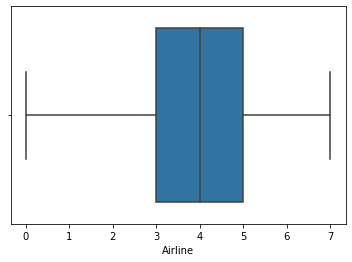

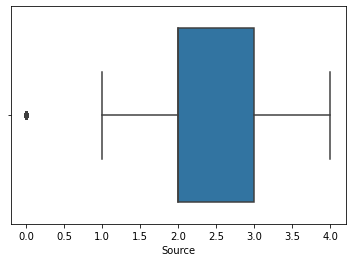

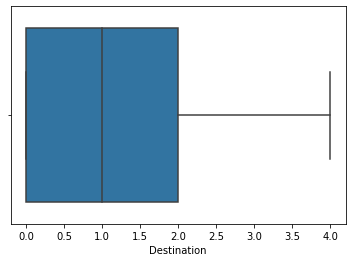

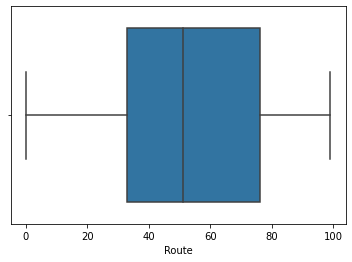

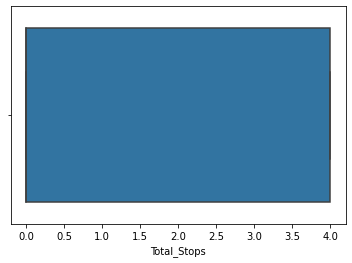

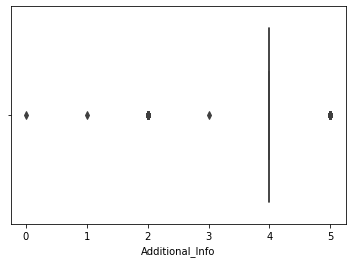

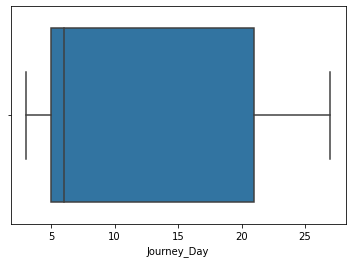

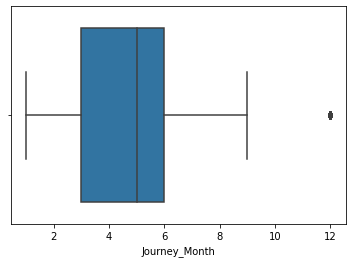

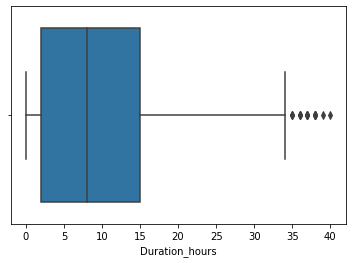

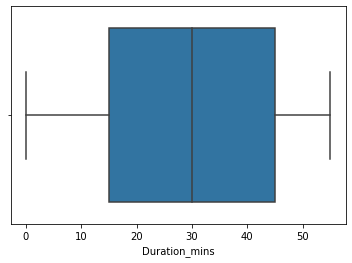

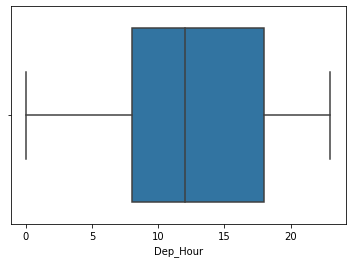

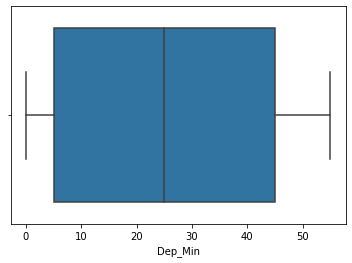

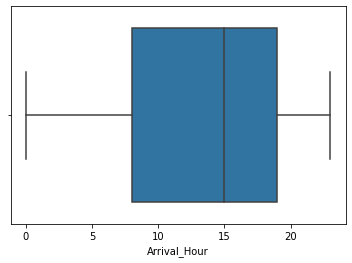

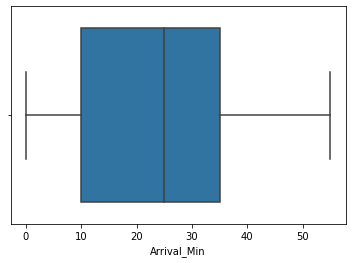

In [161]:
for i in test_fp.columns:
    sns.boxplot(test_fp[i])
    plt.show()

Airline               AxesSubplot(0.125,0.536818;0.0596154x0.343182)
Source             AxesSubplot(0.196538,0.536818;0.0596154x0.343182)
Destination        AxesSubplot(0.268077,0.536818;0.0596154x0.343182)
Route              AxesSubplot(0.339615,0.536818;0.0596154x0.343182)
Total_Stops        AxesSubplot(0.411154,0.536818;0.0596154x0.343182)
Additional_Info    AxesSubplot(0.482692,0.536818;0.0596154x0.343182)
Journey_Day        AxesSubplot(0.554231,0.536818;0.0596154x0.343182)
Journey_Month      AxesSubplot(0.625769,0.536818;0.0596154x0.343182)
Duration_hours     AxesSubplot(0.697308,0.536818;0.0596154x0.343182)
Duration_mins      AxesSubplot(0.768846,0.536818;0.0596154x0.343182)
Dep_Hour           AxesSubplot(0.840385,0.536818;0.0596154x0.343182)
Dep_Min                  AxesSubplot(0.125,0.125;0.0596154x0.343182)
Arrival_Hour          AxesSubplot(0.196538,0.125;0.0596154x0.343182)
Arrival_Min           AxesSubplot(0.268077,0.125;0.0596154x0.343182)
dtype: object

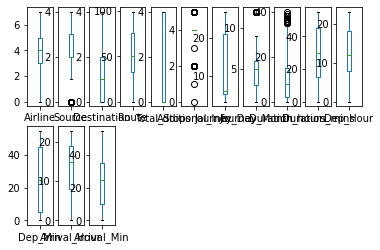

In [162]:
test_fp.plot(kind='box',subplots=True,layout=(2,11))

We can see outliers present in `Source, Additional_Info, Journey_Month, Duration_hours`.

# Removing Outliers

In [163]:
df_outlier=test_fp[["Source", "Additional_Info","Journey_Month","Duration_hours"]]

We will use z-score method to remove outliers.

In [164]:
from scipy.stats import zscore

z=np.abs(zscore(df_outlier))
TEST_FP=test_fp[(z<3).all(axis=1)]
TEST_FP

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,2,1,76,0,4,6,6,10,55,17,30,4,25
1,3,3,0,65,0,4,5,12,4,0,6,20,10,20
2,4,2,1,76,0,2,21,5,23,45,19,15,19,0
3,5,2,1,76,0,4,21,5,13,0,8,0,21,0
4,0,0,2,16,4,4,24,6,2,50,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,0,4,6,6,23,55,20,30,20,25
2667,3,3,0,43,4,4,27,3,2,35,14,20,16,55
2668,4,2,1,76,0,4,3,6,6,35,21,50,4,25
2669,1,2,1,76,0,4,3,6,15,15,4,0,19,15


In [165]:
TEST_FP.shape

(2651, 14)

In [166]:
test_fp.shape

(2671, 14)

In [167]:
Data_loss=((2671-2651)/2671)*100
Data_loss

0.7487832272557094

The data loss is `0.74 %`.

# Skewness

In [168]:
TEST_FP.skew().sort_values()

Additional_Info   -1.550317
Arrival_Hour      -0.433060
Source            -0.426109
Route             -0.276527
Airline           -0.202849
Duration_mins     -0.109934
Dep_Hour           0.082330
Arrival_Min        0.109219
Dep_Min            0.133773
Journey_Day        0.474130
Journey_Month      0.592066
Total_Stops        0.666334
Destination        0.792934
Duration_hours     0.796171
dtype: float64

We can see high levels of skewness present in most of the columns.

In [169]:
df_skewed=["Source", "Destination","Route","Total_Stops","Journey_Month","Duration_hours","Arrival_Hour","Additional_Info"]

We shall use Power Transformer to remove skewness.

In [170]:
from sklearn.preprocessing import PowerTransformer
scal = PowerTransformer(method='yeo-johnson')

In [171]:
TEST_FP[df_skewed] = scal.fit_transform(TEST_FP[df_skewed].values)

In [172]:
TEST_FP[df_skewed].skew()

Source            -0.239906
Destination       -0.017608
Route             -0.317889
Total_Stops        0.358003
Journey_Month     -0.032203
Duration_hours    -0.038134
Arrival_Hour      -0.404194
Additional_Info    0.035264
dtype: float64

The skewness is reduced.

In [173]:
TEST_FP

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,-0.022875,0.026457,0.804195,-0.886693,0.271920,6,0.260739,0.337407,55,17,30,-1.354768,25
1,3,0.883563,-1.394691,0.407921,-0.886693,0.271920,5,1.804950,-0.610525,0,6,20,-0.516779,20
2,4,-0.022875,0.026457,0.804195,-0.886693,-1.899468,21,-0.065391,1.358333,45,19,15,0.774176,0
3,5,-0.022875,0.026457,0.804195,-0.886693,0.271920,21,-0.065391,0.643853,0,8,0,1.064694,0
4,0,-1.597908,0.920166,-1.420967,1.311254,0.271920,24,0.260739,-1.182927,50,23,55,-1.626653,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,0.883563,-1.394691,-0.102109,-0.886693,0.271920,6,0.260739,1.358333,55,20,30,0.919298,25
2667,3,0.883563,-1.394691,-0.397033,1.311254,0.271920,27,-0.829036,-1.182927,35,14,20,0.340602,55
2668,4,-0.022875,0.026457,0.804195,-0.886693,0.271920,3,0.260739,-0.215857,35,21,50,-1.354768,25
2669,1,-0.022875,0.026457,0.804195,-0.886693,0.271920,3,0.260739,0.816999,15,4,0,0.774176,15


# Correlation

In [174]:
TEST_FP.corr()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.036436,0.074452,0.023559,-0.093381,0.034192,0.002900,0.004791,-0.096077,-0.065832,0.009030,-0.058102,-0.007973,-0.119546
Source,-0.036436,1.000000,-0.482178,0.301314,-0.165969,0.003490,-0.031701,0.039669,0.110306,-0.131610,0.060243,-0.059201,0.002249,0.004881
Destination,0.074452,-0.482178,1.000000,-0.183762,0.402200,0.107003,0.038801,-0.057488,-0.418472,0.035017,-0.095823,0.099745,-0.035548,-0.015583
Route,0.023559,0.301314,-0.183762,1.000000,-0.382538,-0.001476,0.050716,0.082765,0.366885,-0.220133,-0.130587,-0.049586,0.000425,-0.211327
Total_Stops,-0.093381,-0.165969,0.402200,-0.382538,1.000000,0.277339,0.074414,-0.046868,-0.668695,0.177137,0.055807,0.066869,-0.112680,0.199787
Additional_Info,0.034192,0.003490,0.107003,-0.001476,0.277339,1.000000,-0.012858,-0.004896,-0.281949,0.050442,-0.055020,0.023627,-0.062337,0.035016
Journey_Day,0.002900,-0.031701,0.038801,0.050716,0.074414,-0.012858,1.000000,-0.172578,-0.059972,0.018794,-0.025934,-0.020372,0.016877,-0.010001
Journey_Month,0.004791,0.039669,-0.057488,0.082765,-0.046868,-0.004896,-0.172578,1.000000,0.089843,-0.021703,-0.003287,-0.002428,0.008818,-0.035387
Duration_hours,-0.096077,0.110306,-0.418472,0.366885,-0.668695,-0.281949,-0.059972,0.089843,1.000000,-0.135285,-0.026783,-0.011746,0.047997,-0.131590
Duration_mins,-0.065832,-0.131610,0.035017,-0.220133,0.177137,0.050442,0.018794,-0.021703,-0.135285,1.000000,-0.027512,0.092795,-0.122319,0.176070


<AxesSubplot:>

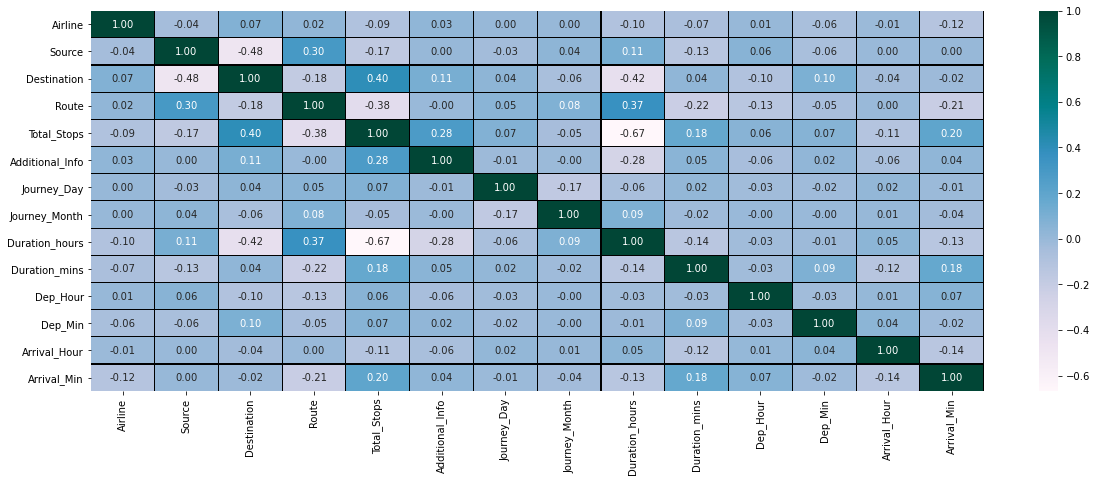

In [175]:
# Visualizing TEST_FP.corr() using heatmap
plt.figure(figsize=(20,7))
sns.heatmap(TEST_FP.corr(),annot=True,cmap='PuBuGn',linewidths=0.1,linecolor="black",fmt=".2f")

# Scaling the Test Dataset

In [176]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
TEST_FP = pd.DataFrame(scaler.fit_transform(TEST_FP), columns=TEST_FP.columns)
TEST_FP

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.232746,-0.022875,0.026457,0.804195,-0.886693,0.271920,-0.707021,0.260739,0.337407,1.583603,0.765641,0.272907,-1.354768,0.025265
1,-0.349339,0.883563,-1.394691,0.407921,-0.886693,0.271920,-0.823903,1.804950,-0.610525,-1.697119,-1.173127,-0.251921,-0.516779,-0.272417
2,0.232746,-0.022875,0.026457,0.804195,-0.886693,-1.899468,1.046203,-0.065391,1.358333,0.987108,1.118144,-0.514336,0.774176,-1.463149
3,0.814830,-0.022875,0.026457,0.804195,-0.886693,0.271920,1.046203,-0.065391,0.643853,-1.697119,-0.820624,-1.301578,1.064694,-1.463149
4,-2.095592,-1.597908,0.920166,-1.420967,1.311254,0.271920,1.396848,0.260739,-1.182927,1.285355,1.823150,1.584977,-1.626653,1.215997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,-1.513507,0.883563,-1.394691,-0.102109,-0.886693,0.271920,-0.707021,0.260739,1.358333,1.583603,1.294395,0.272907,0.919298,0.025265
2647,-0.349339,0.883563,-1.394691,-0.397033,1.311254,0.271920,1.747493,-0.829036,-1.182927,0.390613,0.236886,-0.251921,0.340602,1.811362
2648,0.232746,-0.022875,0.026457,0.804195,-0.886693,0.271920,-1.057666,0.260739,-0.215857,0.390613,1.470647,1.322563,-1.354768,0.025265
2649,-1.513507,-0.022875,0.026457,0.804195,-0.886693,0.271920,-1.057666,0.260739,0.816999,-0.802377,-1.525630,-1.301578,0.774176,-0.570100


# VIF

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(TEST_FP.values, i) for i in range(TEST_FP.shape[1])]
vif["Features"]=TEST_FP.columns
vif

,VIF,Features
0,1.084344,Airline
1,1.479420,Source
2,1.705994,Destination
3,1.448034,Route
4,2.174896,Total_Stops
5,1.138521,Additional_Info
6,1.053649,Journey_Day
7,1.045794,Journey_Month
8,2.160578,Duration_hours
9,1.120180,Duration_mins


No extreme VIF values, multicollinearity is good.

# Prediction of Flight Price

In [178]:
# Predicting the flight price from the features of the testing data 
Predicted_Price = train_model.predict(TEST_FP)
Predicted_Price

array([13018.87952979,  4711.32125   , 10566.90843383, ...,
       14383.20221964,  8165.71531086,  7809.53941831])

Here we are using our predicted final model which is saved as `train_model` to predict the price of the test dataset that was provided containing only the features.

In [179]:
Prediction = pd.DataFrame()
Prediction['Price']= Predicted_Price
Prediction

,Price
0,13018.879530
1,4711.321250
2,10566.908434
3,9996.364734
4,4492.491875
...,...
2646,11154.796056
2647,5081.681368
2648,14383.202220
2649,8165.715311
